<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data(y_hat)_multi_delta_(_2_8)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-2.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2.8_n20.csv',
 'data_multi_delta_-2.8_n30.csv',
 'data_multi_delta_-2.8_n60.csv',
 'data_multi_delta_-2.8_n120.csv',
 'data_multi_delta_-2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.8_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,69.886549,75.644787,-0.001042,155.530295,155.531734,-0.001439
1,0.0,1.0,42.396882,36.388566,0.007338,88.792787,88.785417,0.007370
2,0.0,2.0,77.856916,20.839503,-0.030228,108.666191,108.697878,-0.031687
3,0.0,3.0,84.219726,55.221814,0.001820,149.443360,149.442740,0.000620
4,0.0,4.0,52.749790,76.336548,-0.000933,139.085404,139.086111,-0.000707
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,97.439336,90.306955,0.000839,197.747130,197.747065,0.000065
119996,999.0,116.0,84.832878,83.672487,0.000821,178.506186,178.505914,0.000272
119997,999.0,117.0,96.047249,34.667011,-0.010377,140.703883,140.712182,-0.008299
119998,999.0,118.0,67.464257,99.176907,-0.000870,176.640293,176.642673,-0.002380


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,69.886549,75.644787,-0.001042,155.530295,155.531734,-0.001439
1,0.0,1.0,42.396882,36.388566,0.007338,88.792787,88.785417,0.007370
2,0.0,2.0,77.856916,20.839503,-0.030228,108.666191,108.697878,-0.031687
3,0.0,3.0,84.219726,55.221814,0.001820,149.443360,149.442740,0.000620
4,0.0,4.0,52.749790,76.336548,-0.000933,139.085404,139.086111,-0.000707
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,97.439336,90.306955,0.000839,197.747130,197.747065,0.000065
119996,999.0,116.0,84.832878,83.672487,0.000821,178.506186,178.505914,0.000272
119997,999.0,117.0,96.047249,34.667011,-0.010377,140.703883,140.712182,-0.008299
119998,999.0,118.0,67.464257,99.176907,-0.000870,176.640293,176.642673,-0.002380


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    69.886549  75.644787 -0.001042  155.530295  155.531734 -0.001439
      1.0    42.396882  36.388566  0.007338   88.792787   88.785417  0.007370
      2.0    77.856916  20.839503 -0.030228  108.666191  108.697878 -0.031687
      3.0    84.219726  55.221814  0.001820  149.443360  149.442740  0.000620
      4.0    52.749790  76.336548 -0.000933  139.085404  139.086111 -0.000707
...                ...        ...       ...         ...         ...       ...
999.0 115.0  97.439336  90.306955  0.000839  197.747130  197.747065  0.000065
      116.0  84.832878  83.672487  0.000821  178.506186  178.505914  0.000272
      117.0  96.047249  34.667011 -0.010377  140.703883  140.712182 -0.008299
      118.0  67.464257  99.176907 -0.000870  176.640293  176.642673 -0.002380
      119.0  47.090906  67.406724 -0.004284  124.493346  124.497692 -0.004346

[120000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    69.886549  75.644787 -0.001042  155.530295  155.531734 -0.001439
      1.0    42.396882  36.388566  0.007338   88.792787   88.785417  0.007370
      2.0    77.856916  20.839503 -0.030228  108.666191  108.697878 -0.031687
      3.0    84.219726  55.221814  0.001820  149.443360  149.442740  0.000620
      4.0    52.749790  76.336548 -0.000933  139.085404  139.086111 -0.000707
...                ...        ...       ...         ...         ...       ...
999.0 115.0  97.439336  90.306955  0.000839  197.747130  197.747065  0.000065
      116.0  84.832878  83.672487  0.000821  178.506186  178.505914  0.000272
      117.0  96.047249  34.667011 -0.010377  140.703883  140.712182 -0.008299
      118.0  67.464257  99.176907 -0.000870  176.640293  176.642673 -0.002380
      119.0  47.090906  67.406724 -0.004284  124.493346  124.497692 -0.004346

[120000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,69.886549,75.644787,-0.001042,155.530295,155.531734,-0.001439
1,0.0,1.0,42.396882,36.388566,0.007338,88.792787,88.785417,0.007370
2,0.0,2.0,77.856916,20.839503,-0.030228,108.666191,108.697878,-0.031687
3,0.0,3.0,84.219726,55.221814,0.001820,149.443360,149.442740,0.000620
4,0.0,4.0,52.749790,76.336548,-0.000933,139.085404,139.086111,-0.000707
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,97.439336,90.306955,0.000839,197.747130,197.747065,0.000065
119996,999.0,116.0,84.832878,83.672487,0.000821,178.506186,178.505914,0.000272
119997,999.0,117.0,96.047249,34.667011,-0.010377,140.703883,140.712182,-0.008299
119998,999.0,118.0,67.464257,99.176907,-0.000870,176.640293,176.642673,-0.002380


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    69.886549  75.644787 -0.001042  155.530295  155.531734 -0.001439
      1.0    42.396882  36.388566  0.007338   88.792787   88.785417  0.007370
      2.0    77.856916  20.839503 -0.030228  108.666191  108.697878 -0.031687
      3.0    84.219726  55.221814  0.001820  149.443360  149.442740  0.000620
      4.0    52.749790  76.336548 -0.000933  139.085404  139.086111 -0.000707
...                ...        ...       ...         ...         ...       ...
999.0 115.0  97.439336  90.306955  0.000839  197.747130  197.747065  0.000065
      116.0  84.832878  83.672487  0.000821  178.506186  178.505914  0.000272
      117.0  96.047249  34.667011 -0.010377  140.703883  140.712182 -0.008299
      118.0  67.464257  99.176907 -0.000870  176.640293  176.642673 -0.002380
      119.0  47.090906  67.406724 -0.004284  124.493346  124.497692 -0.004346

[120000 rows x 6 columns]

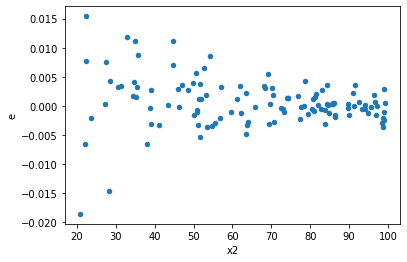

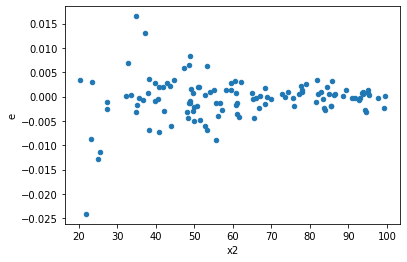

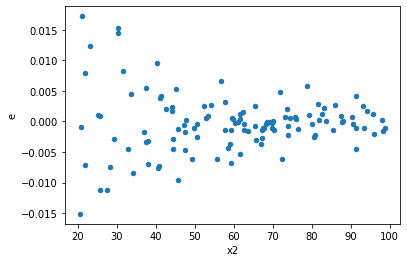

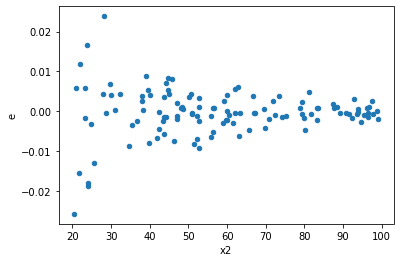

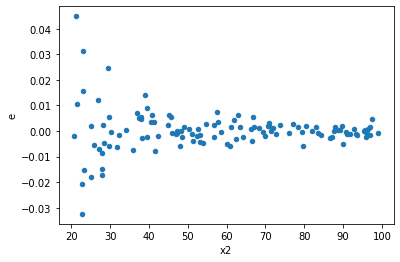

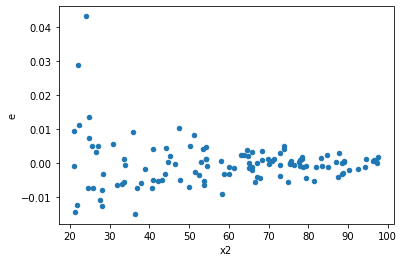

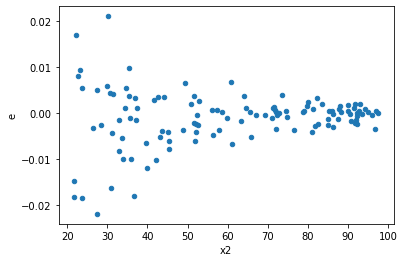

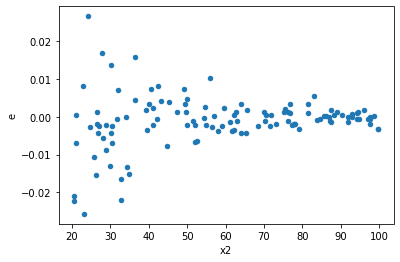

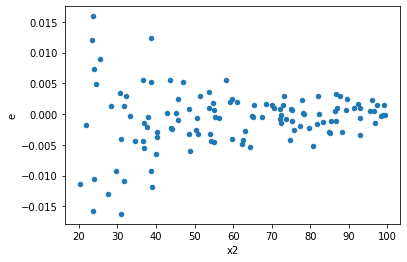

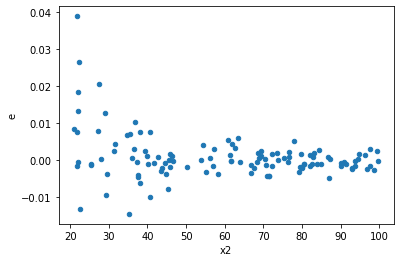

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,46.0,46.0,0.0031374368168074983,0.00038474777745618196,6.820514819146736e-05,8.364082118612652e-06,0.12263124324769109,5.545754258255139e-11,Reject005=0 : Heteroscedasticity
1.0,46.0,46.0,0.0024736029685120705,0.0002725208272303167,5.377397757634936e-05,5.924365809354711e-06,0.1101716122997072,7.69872779177243e-12,Reject005=0 : Heteroscedasticity
2.0,46.0,46.0,0.0012788108566632308,0.00023706565268438474,2.780023601441806e-05,5.153601145312711e-06,0.18537976233870443,6.868622974826056e-08,Reject005=0 : Heteroscedasticity
3.0,46.0,46.0,0.0022394897370270964,0.00020256146113191285,4.868455950058905e-05,4.403510024606801e-06,0.09044982782587406,1.8113478904338934e-13,Reject005=0 : Heteroscedasticity
4.0,46.0,46.0,0.0012334555219173913,0.00032817109149544516,2.681425047646503e-05,7.13415416294446e-06,0.2660583098977961,1.5761016619813263e-05,Reject005=0 : Heteroscedasticity
5.0,46.0,46.0,0.0016599845476760334,0.0005262495574006034,3.60866206016529e-05,1.1440207769578335e-05,0.31702075669159036,0.00015944344636248864,Reject005=0 : Heteroscedasticity
6.0,46.0,46.0,0.0020125899175678715,0.0002991869846105962,4.375195472973634e-05,6.5040648828390475e-06,0.14865769822207536,1.698503776283914e-09,Reject005=0 : Heteroscedasticity
7.0,46.0,46.0,0.0032410437091467265,0.0003920804416820958,7.045747193797231e-05,8.523487862654256e-06,0.12097351250635224,4.326781486372367e-11,Reject005=0 : Heteroscedasticity
8.0,46.0,46.0,0.0031323956601806632,0.00035324042764960355,6.809555783001442e-05,7.67913973151312e-06,0.11277005396860694,1.18771611025428e-11,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    996
Reject005=1 : Homoscedasticity        4
Name: Result_test, dtype: int64